In [1]:
# !pip install pandas
# !pip install numpy
# !pip install scikit-learn
# !pip install matplotlib
# !pip install tensorflow

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


C:\Users\Ash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Ash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Ash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313

In [8]:
ticker = ("NVDA")
years_of_data = 5
prediction_days = 60
future_days = 252


C:\Users\Ash\AppData\Local\Temp\ipykernel_25012\3731700603.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


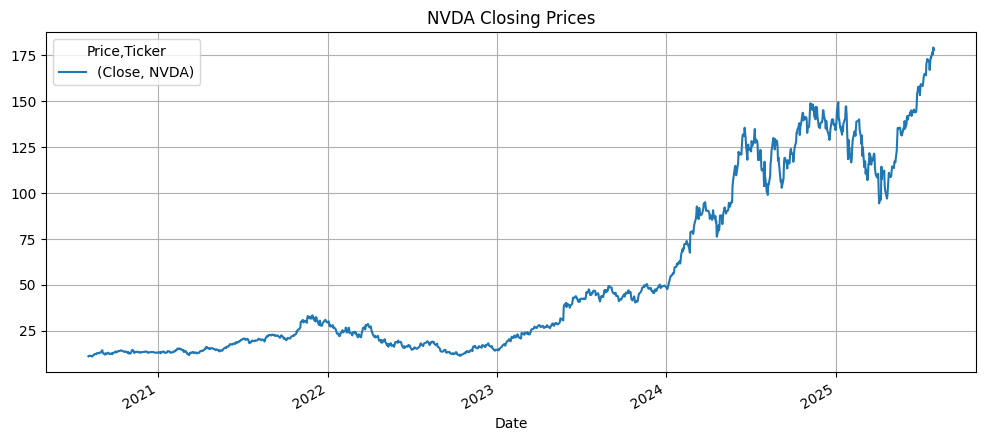

In [9]:
# Get data for the past 5 years
end = pd.Timestamp.today()
start = end - pd.DateOffset(years=years_of_data)
df = yf.download(ticker, start=start, end=end)
data = df[['Close']].dropna()

# Visualize historical closing price
data.plot(figsize=(12, 5), title=f"{ticker} Closing Prices")
plt.grid()
plt.show()


In [10]:
# Normalize closing prices to 0-1 range
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create X (inputs) and y (targets) for model
X, y = [], []
for i in range(prediction_days, len(scaled_data) - future_days):
    X.append(scaled_data[i - prediction_days:i, 0])
    y.append(scaled_data[i:i + future_days, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [11]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=future_days))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X, y, epochs=20, batch_size=32)


Epoch 1/20


C:\Users\Ash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0667
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0160
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0127
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0117
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0112
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0099
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0097
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0096
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0091
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0092
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0084
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0082
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0083
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0079
Epoch 15/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0077
Epoch 16/20
30/

In [12]:
last_sequence = scaled_data[-prediction_days:]
last_sequence = np.reshape(last_sequence, (1, prediction_days, 1))
predicted_scaled = model.predict(last_sequence)
predicted_prices = scaler.inverse_transform(predicted_scaled).flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


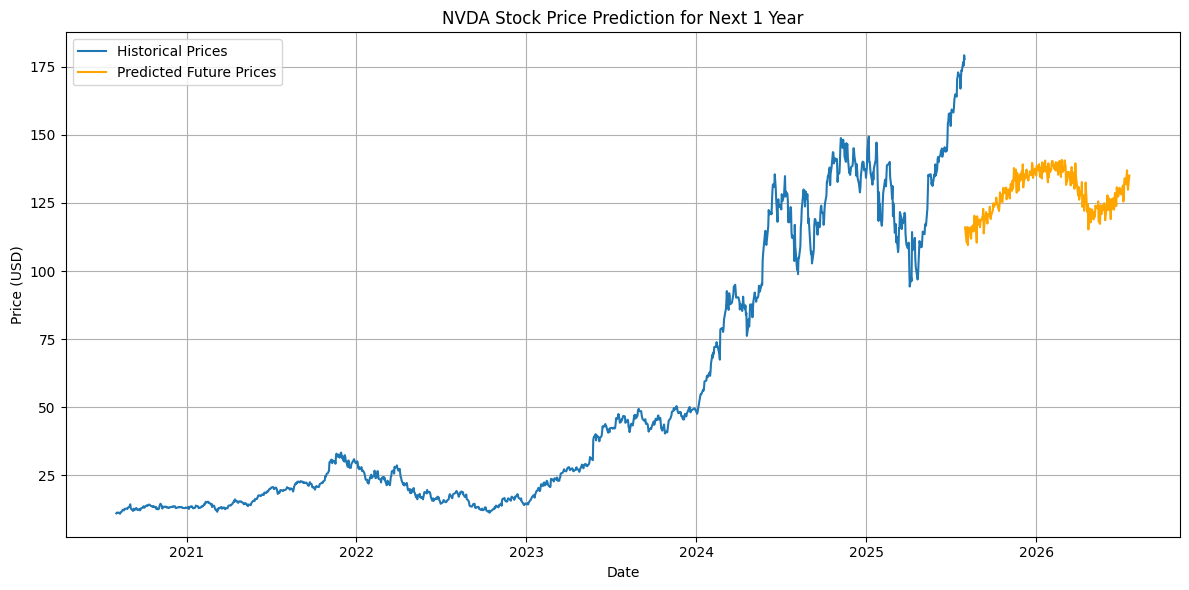

In [13]:
last_known_date = data.index[-1]
future_dates = pd.date_range(start=last_known_date + pd.Timedelta(days=1), periods=future_days, freq='B')

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label="Historical Prices")
plt.plot(future_dates, predicted_prices, color='orange', label="Predicted Future Prices")
plt.title(f"{ticker} Stock Price Prediction for Next 1 Year")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [2]:
!pip install statsmodels
!pip install prophet
!pip install ta

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.6 MB 10.0 MB/s eta 0:00:01
   ------------ --------------------------- 2.9/9.6 MB 9.8 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.6 MB 8.2 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.6 MB 7.1 MB/s eta 0:00:01
   ------------------------- -------------- 6.0/9.6 MB 6.4 MB/s eta 0:00:01
   -------------------------- ------------- 6.3/9.6 MB 6.2 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.6 MB 5.4 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.6 MB 5.4 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.6 MB 5.4 MB/s eta 0:00:01
   ---------------------------- ----------- 6.8/9.6 MB 3.4 MB/s eta 0:00:01
   ---------------------------- ----------- 6.8/9.6 MB 3.4 MB/s eta 0:00:01
   -------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29497 sha256=babef8ddeb4b12bfb438926f6530393f0ff91f4c2cd951d9118e59f63241a2f4
  Stored in directory: c:\users\ash\appdata\local\packages\pythonsoftwarefoundation.python.3.13_qbz5n2kfra8p0\localcache\local\pip\cache\wheels\e3\3a\ee\4955a26c90a4b7deb6d725dc8ec7b8604a7aef44e43a2e8af7
Successfully built ta


  DEPRECATION: Building 'ta' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'ta'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from prophet import Prophet


C:\Users\Ash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [18]:

ticker = "NVDA"
years_of_data = 5

end = pd.Timestamp.today()
start = end - pd.DateOffset(years=years_of_data)
df = yf.download(ticker, start=start, end=end)

df = df[['Close']].dropna()
df.reset_index(inplace=True)


C:\Users\Ash\AppData\Local\Temp\ipykernel_22232\119478113.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


C:\Users\Ash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. fore

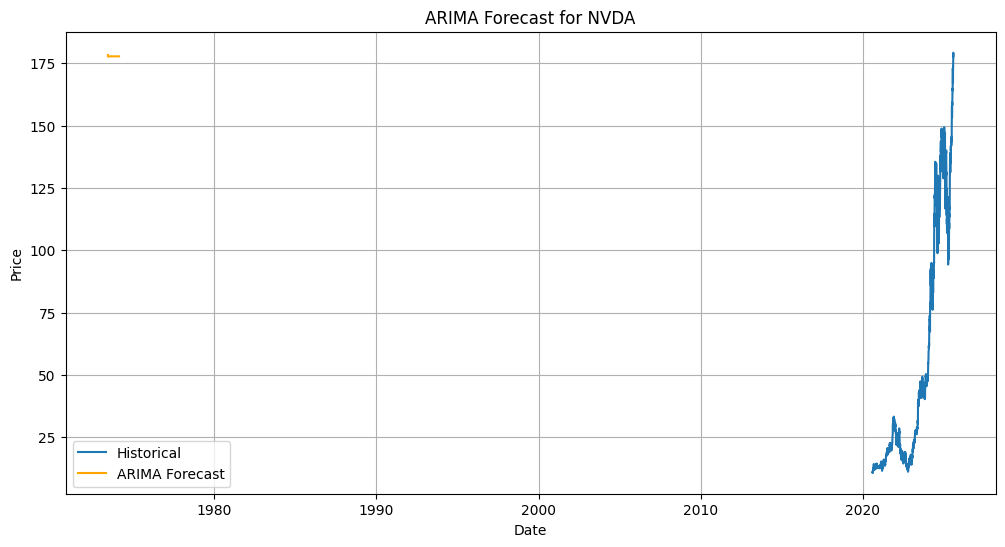

In [19]:

# Fit ARIMA Model
arima_data = df.set_index('Date')['Close']
model_arima = ARIMA(arima_data, order=(5,1,0))
results_arima = model_arima.fit()

# Forecast next 252 days
forecast_arima = results_arima.forecast(steps=252)

# Plot
plt.figure(figsize=(12,6))
plt.plot(arima_data, label='Historical')
plt.plot(forecast_arima.index, forecast_arima, label='ARIMA Forecast', color='orange')
plt.title(f"ARIMA Forecast for {ticker}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()
plt.legend()
plt.show()


17:43:07 - cmdstanpy - INFO - Chain [1] start processing


ds    datetime64[ns]
y            float64
dtype: object
(1255, 2)
          ds          y
0 2020-08-03  10.974078
1 2020-08-04  11.190863
2 2020-08-05  11.249671
3 2020-08-06  11.298260
4 2020-08-07  11.162706


17:43:07 - cmdstanpy - INFO - Chain [1] done processing


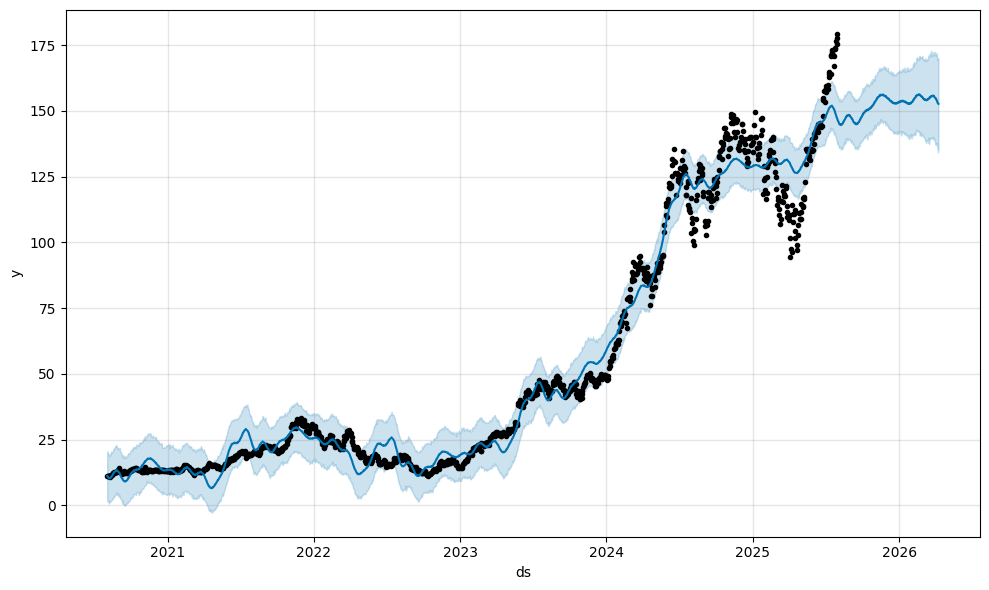

In [20]:
# Ensure 'Date' column exists and is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create Prophet-compatible dataframe
df_prophet = pd.DataFrame()
df_prophet['ds'] = df['Date']
df_prophet['y'] = df['Close'].values  # <- use .values to ensure it's 1D

# Confirm shape and types
print(df_prophet.dtypes)
print(df_prophet.shape)
print(df_prophet.head())

# Fit the model
m = Prophet(daily_seasonality=True)
m.fit(df_prophet)

# Forecast next 252 trading days (~1 year)
future = m.make_future_dataframe(periods=252)
forecast = m.predict(future)

# Plot forecast
fig = m.plot(forecast)


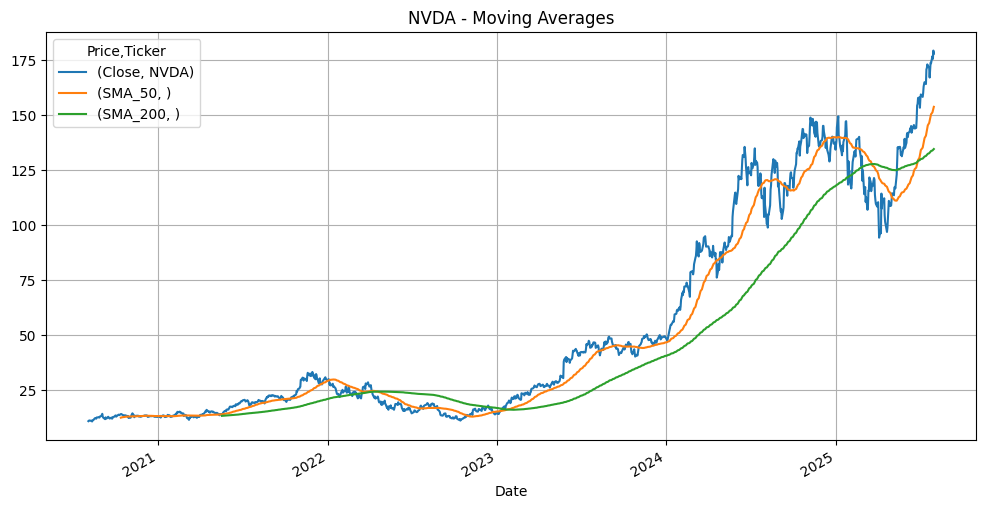

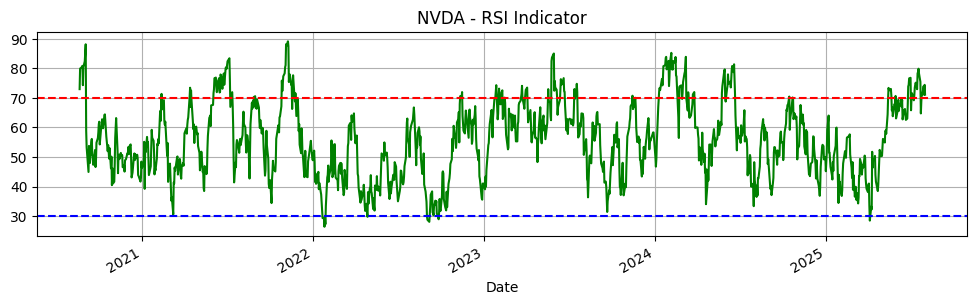

In [21]:
import ta

# Ensure 'Close' is a flat Series (not 2D)
close_prices = df['Close'].squeeze()  # or use df['Close'].astype(float)

# Add indicators correctly
df['SMA_50'] = ta.trend.sma_indicator(close_prices, window=50)
df['SMA_200'] = ta.trend.sma_indicator(close_prices, window=200)
df['RSI'] = ta.momentum.rsi(close_prices)
df['MACD'] = ta.trend.macd_diff(close_prices)


# Moving Averages
df.set_index('Date')[['Close', 'SMA_50', 'SMA_200']].plot(figsize=(12, 6), title=f"{ticker} - Moving Averages")
plt.grid()
plt.show()

# RSI
df.set_index('Date')['RSI'].plot(figsize=(12, 3), title=f"{ticker} - RSI Indicator", color='green')
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='blue')
plt.grid()
plt.show()



In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Extract close prices
close_prices = df['Close'].dropna()

# Calculate log returns
log_returns = np.log(close_prices / close_prices.shift(1)).dropna()

# Simulation parameters
num_simulations = 100
num_days = 252
last_price = close_prices.iloc[-1]

# Initialize simulations array
simulations = np.zeros((num_days, num_simulations))

# Run simulations
for i in range(num_simulations):
    prices = np.zeros(num_days)
    prices[0] = last_price
    for t in range(1, num_days):
        drift = log_returns.mean()
        shock = log_returns.std() * np.random.normal()
        prices[t] = prices[t-1] * np.exp(drift + shock)
    simulations[:, i] = prices


C:\Users\Ash\AppData\Local\Temp\ipykernel_22232\2754929398.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  prices[0] = last_price
C:\Users\Ash\AppData\Local\Temp\ipykernel_22232\2754929398.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  prices[t] = prices[t-1] * np.exp(drift + shock)


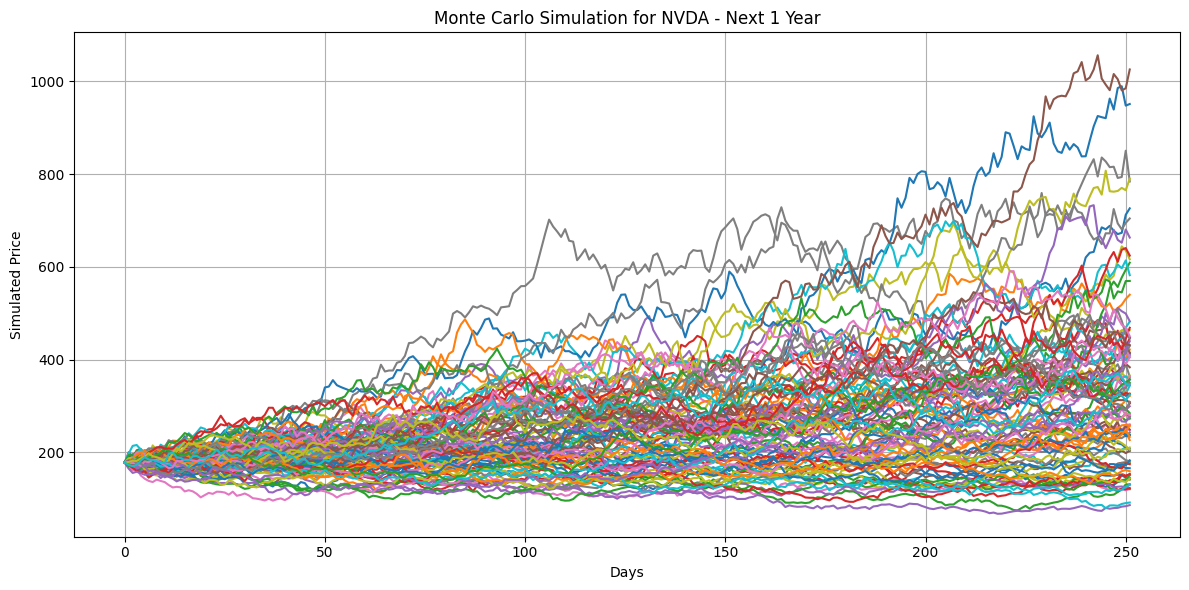

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(simulations)
plt.title(f"Monte Carlo Simulation for {ticker} - Next 1 Year")
plt.xlabel("Days")
plt.ylabel("Simulated Price")
plt.grid(True)
plt.tight_layout()
plt.show()
